In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

# Read Data
Data source: http://wetter.provinz.bz.it/download-messdaten.asp

In [5]:
parse_dates = ['date']

rawData = pd.read_csv('weather_brunico.csv', delimiter= ';', parse_dates=parse_dates)
rawData.dtypes

date             datetime64[ns]
precipitation           float64
maxTemp                  object
minTemp                  object
dtype: object

# Use data between 1990-01-01 and 2018-12-31

In [6]:
df = rawData.copy()
df['minTemp'] = pd.to_numeric(rawData.minTemp, errors='coerce')
df['maxTemp'] = pd.to_numeric(rawData.maxTemp, errors='coerce')

# use data untill 2019
df = df[(df['date'] < datetime.datetime(2019, 1, 1))]
df = df[(df['date'] >= datetime.datetime(1990, 1, 1))]
df = df.sort_values(by=['date'])
df

,date,precipitation,maxTemp,minTemp
1461,1990-01-01,0.0,0.0,-12.0
1492,1990-01-02,0.0,6.0,-1.0
1520,1990-01-03,2.2,8.0,-1.0
1551,1990-01-04,0.0,20.0,-1.0
1581,1990-01-05,0.0,23.0,4.0
...,...,...,...,...
12048,2018-12-27,0.0,3.3,-9.1
12049,2018-12-28,0.0,3.0,-6.1
12050,2018-12-29,0.0,4.8,-7.5
12051,2018-12-30,0.0,2.7,-5.2


In [7]:
df['avg'] = df[['minTemp', 'maxTemp']].mean(axis=1)
df

,date,precipitation,maxTemp,minTemp,avg
1461,1990-01-01,0.0,0.0,-12.0,-6.00
1492,1990-01-02,0.0,6.0,-1.0,2.50
1520,1990-01-03,2.2,8.0,-1.0,3.50
1551,1990-01-04,0.0,20.0,-1.0,9.50
1581,1990-01-05,0.0,23.0,4.0,13.50
...,...,...,...,...,...
12048,2018-12-27,0.0,3.3,-9.1,-2.90
12049,2018-12-28,0.0,3.0,-6.1,-1.55
12050,2018-12-29,0.0,4.8,-7.5,-1.35
12051,2018-12-30,0.0,2.7,-5.2,-1.25


# Average Temperature per year

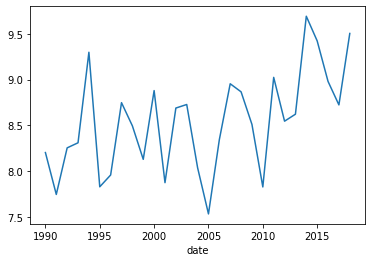

In [8]:
gbm = df.groupby([df['date'].dt.strftime('%Y')])['avg'].mean()
# gca stands for 'get current axis'
ax = plt.gca()

gbm.plot(kind='line',x='date',y='avg',ax=ax)
plt.show()

# Total days with >= 25°

In [51]:
gt25 = df[(df['avg'] >= 25)]
print("Total days with >= 25°: "+ str(gt25.shape[0]))
gt25

Total days with >= 25°: 15


,date,precipitation,maxTemp,minTemp,avg
2410,1992-07-08,0.0,33.0,17.0,25.00
2393,1992-07-21,0.0,33.0,18.0,25.50
3138,1994-05-08,0.2,35.0,15.0,25.00
3488,1995-07-21,0.0,34.0,16.0,25.00
3493,1995-07-26,0.2,34.0,17.0,25.50
3494,1995-07-27,0.0,34.0,16.0,25.00
8961,2010-07-15,0.0,34.1,16.0,25.05
8962,2010-07-16,0.0,34.4,16.0,25.20
8963,2010-07-17,0.2,35.2,15.9,25.55
10778,2015-06-07,0.0,34.6,16.3,25.45


# Total days with more than 35°

In [52]:
max30 = df[(df['maxTemp'] >= 35)]
max30.shape[0]
print("Total days with >= 35°: "+ str(max30.shape[0]))
max30

Total days with >= 35°: 10


,date,precipitation,maxTemp,minTemp,avg
3137,1994-04-08,0.2,35.0,14.0,24.50
3138,1994-05-08,0.2,35.0,15.0,25.00
6012,2002-06-18,0.0,35.0,12.0,23.50
6433,2003-08-13,0.0,35.5,9.9,22.70
8963,2010-07-17,0.2,35.2,15.9,25.55
8955,2010-09-07,0.0,35.9,10.7,23.30
8956,2010-10-07,0.0,35.6,12.9,24.25
10076,2013-03-08,0.0,35.7,10.5,23.10
10777,2015-05-07,0.0,35.3,13.2,24.25
10779,2015-07-07,0.0,35.0,17.4,26.20


# Order by Max Temperature

In [53]:
maxSorted = df[df.maxTemp.notnull()]
maxSorted.sort_values(by=['maxTemp'], ascending=False)

,date,precipitation,maxTemp,minTemp,avg
8955,2010-09-07,0.0,35.9,10.7,23.30
10076,2013-03-08,0.0,35.7,10.5,23.10
8956,2010-10-07,0.0,35.6,12.9,24.25
6433,2003-08-13,0.0,35.5,9.9,22.70
10777,2015-05-07,0.0,35.3,13.2,24.25
...,...,...,...,...,...
4014,1996-12-28,0.0,-7.0,-14.0,-10.50
8754,2009-12-20,0.0,-7.1,-19.0,-13.05
8752,2009-12-18,0.0,-7.7,-17.8,-12.75
1862,1991-06-02,0.0,-8.0,-13.0,-10.50


# Order by Min Temperature

In [54]:
minSorted = df[df.minTemp.notnull()]
minSorted.sort_values(by=['minTemp'])

,date,precipitation,maxTemp,minTemp,avg
3300,1995-01-14,0.0,-5.0,-21.0,-13.00
4779,1999-01-02,0.0,-5.0,-21.0,-13.00
9511,2012-01-16,0.0,-4.8,-20.7,-12.75
7303,2005-12-30,0.0,-8.1,-20.2,-14.15
9532,2012-06-02,0.0,-2.3,-20.2,-11.25
...,...,...,...,...,...
10810,2015-07-08,0.0,33.6,17.9,25.75
2393,1992-07-21,0.0,33.0,18.0,25.50
10793,2015-07-21,11.8,32.5,18.0,25.25
6404,2003-07-15,0.0,30.9,18.1,24.50


# WIP

In [55]:
maxDiff = df.sort_values(by=['date'])
maxDiff['diffPrevDay'] = df['avg'] - df['avg'].shift(1)
maxDiff.sort_values(by=['diffPrevDay'])

,date,precipitation,maxTemp,minTemp,avg,diffPrevDay
9136,2011-06-01,0.6,-4.4,-15.9,-10.15,-29.70
1467,1990-07-01,0.0,-1.0,-13.0,-7.00,-29.50
9502,2012-07-01,0.0,0.0,-10.4,-5.20,-29.30
2198,1992-08-01,0.0,1.0,-11.0,-5.00,-29.00
8043,2008-09-01,0.0,-3.7,-12.2,-7.95,-28.95
...,...,...,...,...,...,...
6433,2003-08-13,0.0,35.5,9.9,22.70,26.90
8260,2008-08-13,0.0,27.0,15.4,21.20,27.10
1685,1990-08-13,5.0,27.0,10.0,18.50,28.00
1654,1990-07-13,0.0,31.0,9.0,20.00,29.50
